In [1]:
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

In [2]:
point1 = Point(1, 1)
point2 = Point(-50, 60)
line1 = LineString([(0, 0), (2, 2)])
line2 = LineString([(-1, 2), (5, 2)])
poly1 = Polygon([(0, 0), (4, 0), (4, 4), (0, 4), (0, 0)])
poly2 = Polygon([(-3, -2), (6, 4), (-3, 2), (3, 4), (-3, -2)]) 

In [3]:
from helpers import *

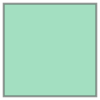

In [4]:
poly1

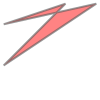

In [5]:
poly2

In [6]:
union1 = poly1.union(poly2)

GEOSException: TopologyException: Input geom 1 is invalid: Self-intersection at or near point 2.1428571428571428 3.1428571428571428 at 2.1428571428571428 3.1428571428571428

In [7]:
poly1.is_valid

True

In [8]:
poly2.is_valid

False

In [9]:
poly2_valid = poly2.buffer(0)

In [10]:
poly2_valid.is_valid

True

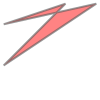

In [11]:
poly2

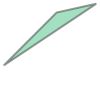

In [12]:
poly2_valid

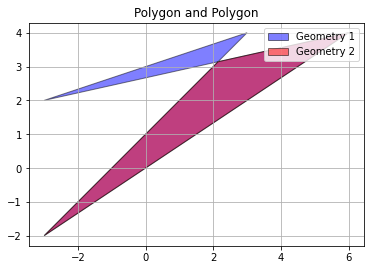

In [13]:
plot_geometries(poly2, poly2_valid)

In [14]:
union2 = poly1.union(poly2_valid)

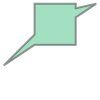

In [15]:
union2

In [16]:
union2.geom_type

'Polygon'

In [17]:
intersection1 = poly1.intersection(poly2_valid)

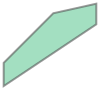

In [18]:
intersection1

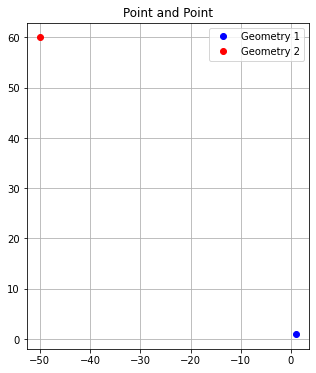

In [19]:
plot_geometries(point1, point2)

In [20]:
intersection2 = point1.intersection(point2)

In [21]:
intersection2.is_empty

True

In [22]:
intersection3 = point1.intersection(line1)

In [23]:
intersection3.is_empty

False

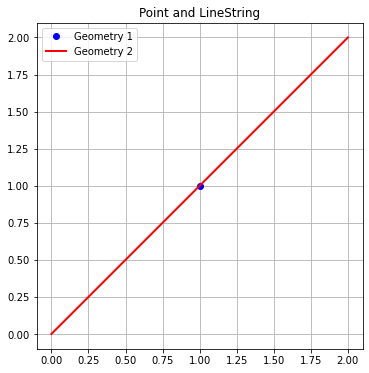

In [24]:
plot_geometries(point1, line1)

In [25]:
diff1 = poly1.difference(poly2_valid)

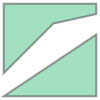

In [26]:
diff1

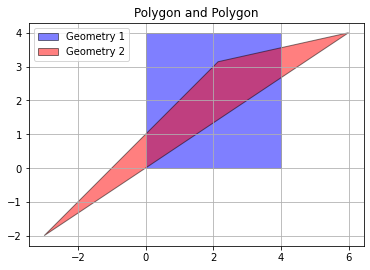

In [27]:
plot_geometries(poly1, poly2_valid)

In [28]:
diff2 = poly1.symmetric_difference(poly2_valid)

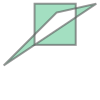

In [29]:
diff2

In [30]:
from shapely.ops import unary_union

In [31]:
result1 = unary_union([poly1, poly2_valid, line1, line2, point1])

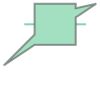

In [32]:
result1

In [33]:
result1.geom_type

'GeometryCollection'

In [34]:
print(result1)

GEOMETRYCOLLECTION (LINESTRING (-1 2, 0 2), LINESTRING (4 2, 5 2), POLYGON ((-3 -2, 0 1, 0 2, 0 4, 4 4, 4 3.555555555555555, 6 4, 4 2.666666666666667, 4 2, 4 0, 0 0, -3 -2)))


In [35]:
result2 = unary_union([poly1, poly2_valid, line1, line2, point1, point2])

In [36]:
result2.geom_type

'GeometryCollection'

In [37]:
print(result2)

GEOMETRYCOLLECTION (POINT (-50 60), LINESTRING (-1 2, 0 2), LINESTRING (4 2, 5 2), POLYGON ((-3 -2, 0 1, 0 2, 0 4, 4 4, 4 3.555555555555555, 6 4, 4 2.666666666666667, 4 2, 4 0, 0 0, -3 -2)))


In [43]:
import geopandas as gpd

In [49]:
gdf = gpd.GeoDataFrame(geometry = [result1])

In [50]:
gdf

,geometry
0,GEOMETRYCOLLECTION (LINESTRING (-1.00000 2.000...


In [51]:
gdf.to_file("E:\OneDrive - VEI\GIS Programming Course_working\test1.shp")

DriverIOError: Geometry type of 'Geometry Collection' not supported in shapefiles.  Type can be overridden with a layer creation option of SHPT=POINT/ARC/POLYGON/MULTIPOINT/POINTZ/ARCZ/POLYGONZ/MULTIPOINTZ/MULTIPATCH.

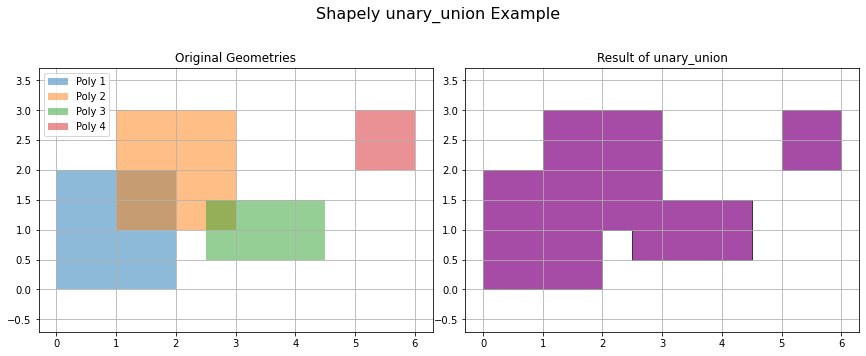

Type of original geometries list: <class 'list'>
Number of original geometries: 4
Type of united geometry: MultiPolygon
Is the united geometry valid? True
Number of parts in the united geometry: 2


In [52]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
from shapely import unary_union # For Shapely 2.x
# from shapely.ops import unary_union # For older Shapely versions

# 1. Create a list of polygons
poly1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2), (0, 0)])
poly2 = box(1, 1, 3, 3)  # A box from (minx, miny, maxx, maxy)
poly3 = Polygon([(2.5, 0.5), (4.5, 0.5), (4.5, 1.5), (2.5, 1.5), (2.5, 0.5)]) # Overlaps with poly2
poly4 = Polygon([(5, 2), (6, 2), (6, 3), (5, 3), (5, 2)]) # A disjoint polygon

geometries = [poly1, poly2, poly3, poly4]

# 2. Perform the unary_union
united_geometry = unary_union(geometries)

# 3. Graphical Presentation using Matplotlib

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Original Geometries
axes[0].set_title('Original Geometries')
for i, geom in enumerate(geometries):
    if geom.geom_type == 'Polygon':
        xs, ys = geom.exterior.xy
        axes[0].fill(xs, ys, alpha=0.5, label=f'Poly {i+1}')
    # Add more complex plotting if dealing with MultiPolygons or lines initially
axes[0].set_aspect('equal', 'datalim')
axes[0].legend()
axes[0].grid(True)

# Plot Unioned Geometry
axes[1].set_title('Result of unary_union')
if united_geometry.geom_type == 'Polygon':
    xs, ys = united_geometry.exterior.xy
    axes[1].fill(xs, ys, alpha=0.7, fc='purple', ec='black')
    # Plot interiors (holes) if any
    for interior in united_geometry.interiors:
        xs_hole, ys_hole = interior.xy
        axes[1].fill(xs_hole, ys_hole, alpha=1.0, fc='white', ec='black')
elif united_geometry.geom_type == 'MultiPolygon':
    for geom_part in united_geometry.geoms: # Use .geoms for Shapely 2.x
        xs, ys = geom_part.exterior.xy
        axes[1].fill(xs, ys, alpha=0.7, fc='purple', ec='black')
        for interior in geom_part.interiors:
            xs_hole, ys_hole = interior.xy
            axes[1].fill(xs_hole, ys_hole, alpha=1.0, fc='white', ec='black')
# Add more complex plotting if expecting LineStrings, Points, or GeometryCollection

axes[1].set_aspect('equal', 'datalim')
axes[1].grid(True)

plt.suptitle('Shapely unary_union Example', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()

# Print the type of the resulting geometry
print(f"Type of original geometries list: {type(geometries)}")
print(f"Number of original geometries: {len(geometries)}")
print(f"Type of united geometry: {united_geometry.geom_type}")
print(f"Is the united geometry valid? {united_geometry.is_valid}")
if hasattr(united_geometry, 'geoms'):
     print(f"Number of parts in the united geometry: {len(list(united_geometry.geoms))}")

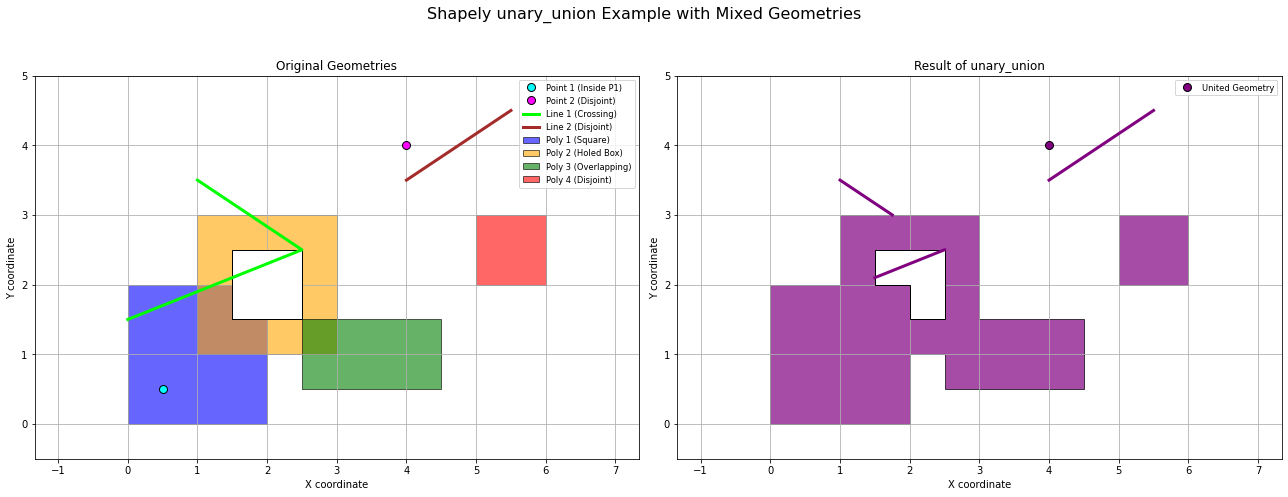

--- Original Geometries ---
  Poly 1 (Square)          : Polygon           , Valid: True
  Poly 2 (Holed Box)       : Polygon           , Valid: True
  Poly 3 (Overlapping)     : Polygon           , Valid: True
  Poly 4 (Disjoint)        : Polygon           , Valid: True
  Point 1 (Inside P1)      : Point             , Valid: True
  Point 2 (Disjoint)       : Point             , Valid: True
  Line 1 (Crossing)        : LineString        , Valid: True
  Line 2 (Disjoint)        : LineString        , Valid: True

--- United Geometry ---
Type: GeometryCollection
Is valid? True
Number of parts in the collection: 6
  Part 1: Point, Area: 0.0, Length: 0.0
  Part 2: LineString, Area: 0.0, Length: 1.0770329614269007
  Part 3: LineString, Area: 0.0, Length: 0.9013878188659973
  Part 4: LineString, Area: 0.0, Length: 1.8027756377319946
  Part 5: Polygon, Area: 8.0, Length: 20.0
  Part 6: Polygon, Area: 1.0, Length: 4.0


In [53]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from shapely.geometry import Polygon, box, Point, LineString
from shapely import unary_union # For Shapely 2.x+
# from shapely.ops import unary_union # For older Shapely versions (e.g., 1.x)

# --- Helper function to plot Shapely geometries ---
def plot_shapely_geometry(ax, geom, facecolor, edgecolor='black', alpha=0.7, label=None, markersize=8, linewidth=3, z_order_offset=0):
    """
    Plots various Shapely geometries on a Matplotlib Axes.
    Handles individual and multi-part geometries, including interiors (holes).
    """
    if geom is None or geom.is_empty:
        return

    geom_type = geom.geom_type

    if geom_type == 'Polygon':
        # Plot exterior
        exterior_coords = list(geom.exterior.coords)
        exterior_path = Path(exterior_coords)
        ax.add_patch(PathPatch(exterior_path, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, label=label, zorder=1 + z_order_offset))

        # Plot interiors (holes)
        for interior in geom.interiors:
            interior_coords = list(interior.coords)
            interior_path = Path(interior_coords)
            ax.add_patch(PathPatch(interior_path, facecolor='white', edgecolor=edgecolor, alpha=1.0, zorder=2 + z_order_offset)) # Holes are white

    elif geom_type == 'MultiPolygon':
        first_part = True
        for part in geom.geoms: # Use .geoms for Shapely 2.x
            plot_shapely_geometry(ax, part, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, 
                                  label=label if first_part else None, 
                                  markersize=markersize, linewidth=linewidth, z_order_offset=z_order_offset)
            first_part = False
            
    elif geom_type == 'Point':
        ax.plot(geom.x, geom.y, 'o', color=facecolor, markeredgecolor=edgecolor, 
                markersize=markersize, label=label, zorder=10 + z_order_offset)
                
    elif geom_type == 'MultiPoint':
        first_part = True
        # Extract all coordinates for potentially faster plotting if many points
        x_coords = [p.x for p in geom.geoms]
        y_coords = [p.y for p in geom.geoms]
        ax.plot(x_coords, y_coords, 'o', color=facecolor, markeredgecolor=edgecolor, 
                markersize=markersize, label=label if first_part else None, zorder=10 + z_order_offset)
        # No need to iterate for label if plotting all at once
        if label and not first_part and len(geom.geoms) > 0 : # ensure label is plotted if it's a multipoint and has a label
             pass # label is handled by the first point logic if we plot one by one
        # If plotting one by one:
        # for part in geom.geoms:
        #     ax.plot(part.x, part.y, 'o', color=facecolor, markeredgecolor=edgecolor,
        #             markersize=markersize, label=label if first_part else None, zorder=10 + z_order_offset)
        #     first_part = False
            
    elif geom_type == 'LineString':
        xs, ys = geom.xy
        ax.plot(xs, ys, color=facecolor, linewidth=linewidth, label=label, zorder=5 + z_order_offset)
        
    elif geom_type == 'MultiLineString':
        first_part = True
        for part in geom.geoms:
            xs, ys = part.xy
            ax.plot(xs, ys, color=facecolor, linewidth=linewidth, 
                    label=label if first_part else None, zorder=5 + z_order_offset)
            first_part = False
            
    elif geom_type == 'GeometryCollection':
        first_part = True
        for i, part in enumerate(geom.geoms):
            # For GeometryCollection, we might want to vary colors or use a consistent one
            # Here, we pass the same facecolor down.
            # We also ensure the label is only applied once for the whole collection if a label is provided.
            current_label = label if first_part else None
            plot_shapely_geometry(ax, part, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, 
                                  label=current_label, markersize=markersize, linewidth=linewidth, z_order_offset=z_order_offset + i*0.1) # slight z_order shift for collection parts
            first_part = False
    else:
        print(f"Skipping unsupported geometry type for this plotter: {geom_type}")


# 1. Create a list of diverse geometries
# Polygons
poly1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2), (0, 0)])
poly2_exterior = [(1, 1), (3, 1), (3, 3), (1, 3), (1, 1)]
poly2_interior = [(1.5, 1.5), (1.5, 2.5), (2.5, 2.5), (2.5, 1.5), (1.5, 1.5)]
poly2_holed = Polygon(poly2_exterior, [poly2_interior])
poly3 = Polygon([(2.5, 0.5), (4.5, 0.5), (4.5, 1.5), (2.5, 1.5), (2.5, 0.5)])
poly4 = Polygon([(5, 2), (6, 2), (6, 3), (5, 3), (5, 2)])

# Points
pt1 = Point(0.5, 0.5)  # Inside poly1
pt2 = Point(4, 4)      # Disjoint

# LineStrings
line1 = LineString([(0, 1.5), (2.5, 2.5), (1, 3.5)]) # Crosses poly1, touches poly2_holed
line2 = LineString([(4, 3.5), (5.5, 4.5)])          # Disjoint

geometries = [
    poly1, poly2_holed, poly3, poly4,
    pt1, pt2,
    line1, line2
]
colors = [
    'blue', 'orange', 'green', 'red',  # Polygon colors
    'cyan', 'magenta',                # Point colors
    'lime', 'brown'                   # Line colors
]
labels = [
    'Poly 1 (Square)', 'Poly 2 (Holed Box)', 'Poly 3 (Overlapping)', 'Poly 4 (Disjoint)',
    'Point 1 (Inside P1)', 'Point 2 (Disjoint)',
    'Line 1 (Crossing)', 'Line 2 (Disjoint)'
]

# 2. Perform the unary_union
# The grid_size parameter can be used to snap coordinates to a grid,
# which can help resolve precision issues and make unions more robust.
# For example: united_geometry = unary_union(geometries, grid_size=0.001)
united_geometry = unary_union(geometries)

# 3. Graphical Presentation using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # Adjusted figure size

# --- Plot Original Geometries ---
axes[0].set_title('Original Geometries')
for i, geom in enumerate(geometries):
    plot_shapely_geometry(axes[0], geom, facecolor=colors[i], alpha=0.6, label=labels[i])

axes[0].set_aspect('equal', 'datalim')
axes[0].legend(fontsize='small')
axes[0].grid(True)
axes[0].set_xlabel("X coordinate")
axes[0].set_ylabel("Y coordinate")

# --- Plot Unioned Geometry ---
axes[1].set_title('Result of unary_union')
# For the united geometry, we use a consistent color for all its parts if it's a collection.
# The plot_shapely_geometry function will handle iterating through GeometryCollection parts.
plot_shapely_geometry(axes[1], united_geometry, facecolor='purple', edgecolor='black', alpha=0.7, label='United Geometry')

axes[1].set_aspect('equal', 'datalim')
axes[1].legend(fontsize='small')
axes[1].grid(True)
axes[1].set_xlabel("X coordinate")
axes[1].set_ylabel("Y coordinate")

plt.suptitle('Shapely unary_union Example with Mixed Geometries', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout
plt.show()

# --- Print some information about the geometries ---
print("--- Original Geometries ---")
for i, geom in enumerate(geometries):
    print(f"  {labels[i]:<25}: {geom.geom_type:<18}, Valid: {geom.is_valid}")

print(f"\n--- United Geometry ---")
print(f"Type: {united_geometry.geom_type}")
print(f"Is valid? {united_geometry.is_valid}")

if united_geometry.geom_type == 'GeometryCollection':
    print(f"Number of parts in the collection: {len(list(united_geometry.geoms))}")
    for i, part in enumerate(united_geometry.geoms):
        print(f"  Part {i+1}: {part.geom_type}, Area: {part.area if hasattr(part, 'area') else 'N/A'}, Length: {part.length if hasattr(part, 'length') else 'N/A'}")
elif hasattr(united_geometry, 'geoms'): # For MultiPolygon, MultiLineString, MultiPoint
     print(f"Number of parts: {len(list(united_geometry.geoms))}")
elif united_geometry.geom_type == 'Polygon':
    print(f"  It has {len(list(united_geometry.interiors))} hole(s).")

